In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import dask_awkward as awkward
import awkward as ak
from distributed import LocalCluster, Client
import numpy as np

cluster = LocalCluster(processes=True)
cluster.adapt(minimum=8, maximum=16)
client = Client(cluster)
root_file = "root://eos.cms.rcac.purdue.edu:1094///store/mc/RunIISummer20UL18NanoAODv9/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/250000/151FCBC0-4DFA-3B4F-BC0D-5D57F9B2387E.root"
# events = NanoEventsFactory.from_root(
#             {root_file : "Events"}, # dataset_dict is just a root file path string in test case
#     schemaclass=NanoAODSchema,
#     # metadata= dataset_dict["metadata"],
#     delayed= False,
#     entry_start = 0,
#     # entry_stop = 50,
# ).events()

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42987 instead
  warnings.warn(


In [2]:
# file_dict =  {"files": {"root://eos.cms.rcac.purdue.edu:1094///store/mc/RunIISummer20UL18NanoAODv9/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/250000/151FCBC0-4DFA-3B4F-BC0D-5D57F9B2387E.root": {"object_path": "Events", "steps": [[0, 80797], [80797, 161594], [161594, 242391], [242391, 323188], [323188, 403985], [403985, 484782], [484782, 565579], [565579, 646376], [646376, 727173], [727173, 807970], [807970, 888760]], "uuid": "bb4d080a-1a5a-11ec-b56a-f21a1e0abeef"}}}
file_dict =  {"files": {"root://eos.cms.rcac.purdue.edu:1094///store/mc/RunIISummer20UL18NanoAODv9/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/250000/151FCBC0-4DFA-3B4F-BC0D-5D57F9B2387E.root": {"object_path": "Events", "steps": [[0, 80797]], "uuid": "bb4d080a-1a5a-11ec-b56a-f21a1e0abeef"}}}

events = NanoEventsFactory.from_root(
    file_dict["files"],
    schemaclass=NanoAODSchema,
    # metadata= dataset_dict["metadata"],
).events()

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


In [3]:
# events.Muon.fields
padded_muon = ak.pad_none(events.Muon, 2)
mu1 = padded_muon[:,0]
mu2 = padded_muon[:,1]
dimuon = mu1+ mu2

In [4]:
jets = events.Jet
print(ak.num(jets, axis=1))
quick_jet_selection  = (jets.pt> 25) & (abs(jets.eta) <  4.7)

dask.awkward<num, npartitions=1>


In [5]:
njets = ak.num(jets[quick_jet_selection], axis=1)
# jets[jet_selection

In [6]:
dimuon_pt_0jet = dimuon.pt[njets==0]
dimuon_pt_1jet = dimuon.pt[njets==1]
dimuon_pt_2jet = dimuon.pt[njets>=2]
dimuon_pt_0jet = ak.to_numpy(dimuon_pt_0jet.compute())
dimuon_pt_0jet = dimuon_pt_0jet[~np.isnan(dimuon_pt_0jet)]
dimuon_pt_1jet = ak.to_numpy(dimuon_pt_1jet.compute())
dimuon_pt_1jet = dimuon_pt_1jet[~np.isnan(dimuon_pt_1jet)]
dimuon_pt_2jet = ak.to_numpy(dimuon_pt_2jet.compute())
dimuon_pt_2jet = dimuon_pt_2jet[~np.isnan(dimuon_pt_2jet)]


/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're 

In [7]:
binning = np.linspace(*[0, 200, 50])
# binning = np.linspace(*[0, 5000, 50])

dimuon_pt_0jet_hist, edges = np.histogram(dimuon_pt_0jet, bins=binning )
dimuon_pt_1jet_hist, _= np.histogram(dimuon_pt_1jet, bins=binning )
dimuon_pt_2jet_hist, _ = np.histogram(dimuon_pt_2jet, bins=binning ) 

In [8]:
# normalize the histograms
dimuon_pt_0jet_hist = dimuon_pt_0jet_hist / np.sum(dimuon_pt_0jet_hist)
dimuon_pt_1jet_hist = dimuon_pt_1jet_hist / np.sum(dimuon_pt_1jet_hist)
dimuon_pt_2jet_hist = dimuon_pt_2jet_hist / np.sum(dimuon_pt_2jet_hist)

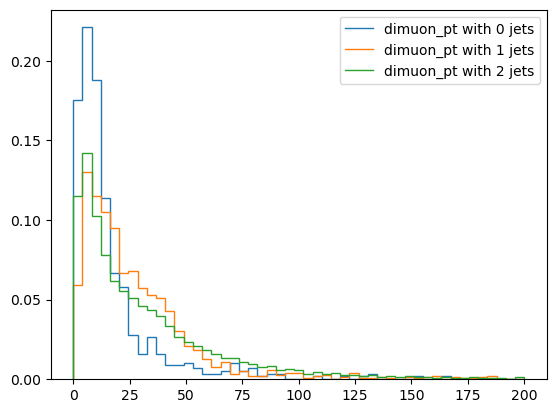

In [9]:
import mplhep as hep
import matplotlib.pyplot as plt 
# hep.style.use("CMS")

plt.stairs(dimuon_pt_0jet_hist, edges, fill=False, label = "dimuon_pt with 0 jets")
plt.stairs(dimuon_pt_1jet_hist, edges, fill=False, label = "dimuon_pt with 1 jets")
plt.stairs(dimuon_pt_2jet_hist, edges, fill=False, label = "dimuon_pt with 2 jets")

plt.legend()
plt.show()

# Now do the same but with the Zpt weights

In [10]:
from coffea.lookup_tools import extractor
zpt_filename = "data/zpt_weights.histo.json"
extractor_instance = extractor()
extractor_instance.add_weight_sets([f"* * {zpt_filename}"])
extractor_instance.finalize()
evaluator = extractor_instance.make_evaluator()
zpt_path = "zpt_weights/2017_value"
evaluator[zpt_path]._axes = evaluator[zpt_path]._axes[0]
zpt_lookup = evaluator[zpt_path]

In [11]:
binning = np.linspace(*[0, 200, 50])
dimuon_pt_0jet_hist, edges = np.histogram(dimuon_pt_0jet, bins=binning, weights= zpt_lookup(dimuon_pt_0jet),density=True)
dimuon_pt_1jet_hist, _= np.histogram(dimuon_pt_1jet, bins=binning, weights= zpt_lookup(dimuon_pt_1jet),density=True)
dimuon_pt_2jet_hist, _ = np.histogram(dimuon_pt_2jet, bins=binning, weights= zpt_lookup(dimuon_pt_2jet),density=True)

In [12]:
# normalize the histograms
dimuon_pt_0jet_hist = dimuon_pt_0jet_hist / np.sum(dimuon_pt_0jet_hist)
dimuon_pt_1jet_hist = dimuon_pt_1jet_hist / np.sum(dimuon_pt_1jet_hist)
dimuon_pt_2jet_hist = dimuon_pt_2jet_hist / np.sum(dimuon_pt_2jet_hist)

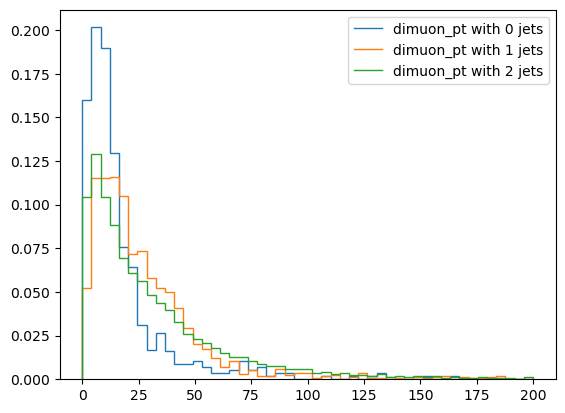

In [13]:
import mplhep as hep
import matplotlib.pyplot as plt 
# hep.style.use("CMS")

plt.stairs(dimuon_pt_0jet_hist, edges, fill=False, label = "dimuon_pt with 0 jets")
plt.stairs(dimuon_pt_1jet_hist, edges, fill=False, label = "dimuon_pt with 1 jets")
plt.stairs(dimuon_pt_2jet_hist, edges, fill=False, label = "dimuon_pt with 2 jets")

plt.legend()
plt.show()

In [14]:
np.max(dimuon_pt_2jet)
# np.min(dimuon_pt_2jet)

239404.2

In [15]:
dimuon_pt_2jet_hist.sum()

1.0